#Nama: Ikko Cahya Awinata
#Judul: PROJECT NLP - TENSORFLOW

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [ ]:
df = pd.read_csv('indonesian-names.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1960 non-null   object
 1   gender  1960 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB


In [ ]:
df

name gender
0                 hafizhan shidqi      m
1                   gandhi wibowo      m
2     aldio mahendra purwandrarto      m
3                     benny putra      m
4            vicky vernando dasta      m
...                           ...    ...
1955                      hadimah      f
1956          aprillia rahma wati      f
1957        muhamad khoirunisa. m      m
1958                      sukandi      m
1959                          eem      f

[1960 rows x 2 columns]

In [ ]:
df['gender'].value_counts()

m    1094
f     866
Name: gender, dtype: int64

In [ ]:
person = df['name'].astype(str)
label = df['gender'].astype(str)

In [ ]:
person_train, person_test, label_train, label_test = train_test_split(person, label, test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(person)
sekuens = tokenizer.texts_to_sequences(person)
padded = pad_sequences(sekuens, maxlen=500)

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(label)
num_classes = len(label_encoder.classes_)

In [ ]:
label_one_hot = tf.keras.utils.to_categorical(encoded_labels, num_classes)

In [ ]:
padded_train, padded_test, label_train, label_test = train_test_split(padded, label_one_hot, test_size=0.2)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2000, output_dim=60, input_length=500),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 60)           120000    
                                                                 
 lstm (LSTM)                 (None, 128)               96768     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9:
            print("\nAccuracy is above > 90%")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
num_epochs = 200
history = model.fit(padded_train, label_train, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2, batch_size = 128, callbacks=[callbacks])

Epoch 1/200
13/13 - 12s - loss: 0.6916 - accuracy: 0.5293 - val_loss: 0.6882 - val_accuracy: 0.5638 - 12s/epoch - 934ms/step
Epoch 2/200
13/13 - 5s - loss: 0.6896 - accuracy: 0.5478 - val_loss: 0.6871 - val_accuracy: 0.5638 - 5s/epoch - 382ms/step
Epoch 3/200
13/13 - 2s - loss: 0.6883 - accuracy: 0.5542 - val_loss: 0.6860 - val_accuracy: 0.5638 - 2s/epoch - 124ms/step
Epoch 4/200
13/13 - 1s - loss: 0.6887 - accuracy: 0.5466 - val_loss: 0.6857 - val_accuracy: 0.5638 - 1s/epoch - 91ms/step
Epoch 5/200
13/13 - 1s - loss: 0.6860 - accuracy: 0.5548 - val_loss: 0.6849 - val_accuracy: 0.5638 - 1s/epoch - 88ms/step
Epoch 6/200
13/13 - 1s - loss: 0.6842 - accuracy: 0.5555 - val_loss: 0.6830 - val_accuracy: 0.5638 - 795ms/epoch - 61ms/step
Epoch 7/200
13/13 - 1s - loss: 0.6728 - accuracy: 0.5529 - val_loss: 0.6645 - val_accuracy: 0.5638 - 599ms/epoch - 46ms/step
Epoch 8/200
13/13 - 1s - loss: 0.6202 - accuracy: 0.5536 - val_loss: 0.5850 - val_accuracy: 0.5638 - 980ms/epoch - 75ms/step
Epoch 9/20

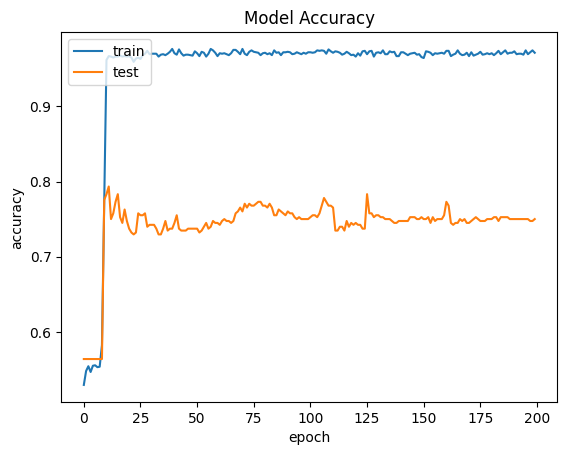

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

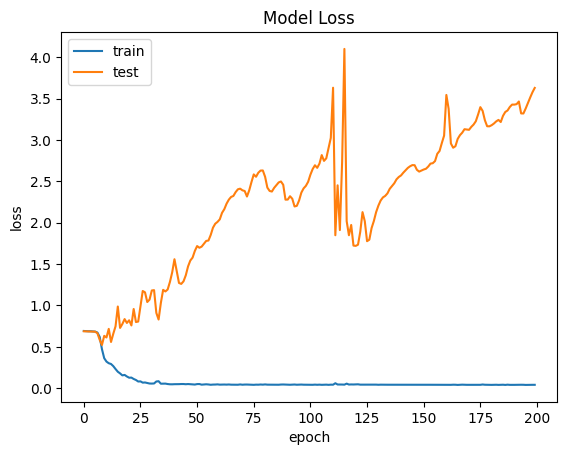

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()